In [ ]:
import pandas as pd
import numpy as np
import os
import json
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
matplotlib.style.use('bmh')
plt.rc('text', usetex=True)
plt.rcParams['font.family'] = "serif"
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams["font.size"]=17
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
! sudo apt install cm-super

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Kategorien/final.csv", encoding="latin-1", index_col="asin")
df.dropna(subset=["categories"], inplace=True)

In [62]:
df

,keyword,lang,class,comment,categories,distance
asin,,,,,,
B005PKNG7Y,anhaÃÂÃÂngerplanen & anhaÃÂÃÂngernetze,DE,0,NaN,"['Sport & Freizeit', 'Sport & Outdoor AktivitÃ...",5
B06XC4PH3S,anhaÃÂÃÂngerplanen & anhaÃÂÃÂngernetze,DE,1,NaN,"['Auto & Motorrad', 'Wohnmobilausstattung', 'A...",2
B06XC5MRX6,anhaÃÂÃÂngerplanen & anhaÃÂÃÂngernetze,DE,1,NaN,"['Auto & Motorrad', 'Transportsysteme', 'AnhÃ¤...",1
B06XT83838,anhaÃÂÃÂngerplanen & anhaÃÂÃÂngernetze,DE,0,NaN,"['Baumarkt', 'Eisenwaren', 'Planen & Spanngurt...",4
B06XWV1GMM,anhaÃÂÃÂngerplanen & anhaÃÂÃÂngernetze,DE,0,NaN,"['Auto & Motorrad', 'Transportsysteme', 'AnhÃ¤...",0
...,...,...,...,...,...,...
B07B4HRB1T,trauringe,DE,1,NaN,"['Schmuck', 'Bijouterie', 'Ringe']",0
B072Q6PD37,trauringe,DE,1,NaN,"['Schmuck', 'Bijouterie', 'Ringe']",0
B07ZHL74WB,trauringe,DE,1,NaN,"['Schmuck', 'Damen', 'Ringe']",0


# Funktionsweise der Kategoriedistanz

Kategorie $\equiv$ Kategoriebaum eines Produkts

Falls Kategorie Teilmenge der Ref.Kategorie $\Leftrightarrow$ Distanz=0

Anzahl der Knoten die nicht in Ref.Kat $=:$ Distanz

In [60]:
def categories_distance(inp, ref):
  ref=eval(ref)
  inp=eval(inp["categories"])
  if inp[-1] in ref:
    return 0
  else:
    ind_dict=dict((i, k+1) for k, i in enumerate(ref))
    interset=set(ref).intersection(inp)
    maxx=[ind_dict[k] for k in interset]
    if len(maxx)==0:
      return len(inp)
    else:
      return len(inp)-max(maxx)
grouped=df.groupby("keyword")
a=[]
for keyws, keyws_df in grouped:
  ref_cat=keyws_df.loc[keyws_df.comment=="Referenz"].categories[-1]
  a.append(keyws_df.apply(lambda row: categories_distance(row, ref_cat), axis=1))
dist=a[0]
df["distance"]=dist.append(a[1:])

In [61]:
def score(df):  
  dd={}
  pred=[]
  for c in range(4):
    pred.append([0 if d > c else 1 for d in df.distance])
    dd[c]=metrics.accuracy_score(df["class"].values, pred[c])
  return dd, pred
dd, pred=score(df)

def b_error(df, pred):
  x=np.zeros(4)
  for k in range(4):
    for i, d in enumerate(df["class"].values):
      if d<pred[k][i]:
        x[k]+=1
      elif d>pred[k][i]:
        x[k]-=1
  return x
b_err=b_error(df, pred)

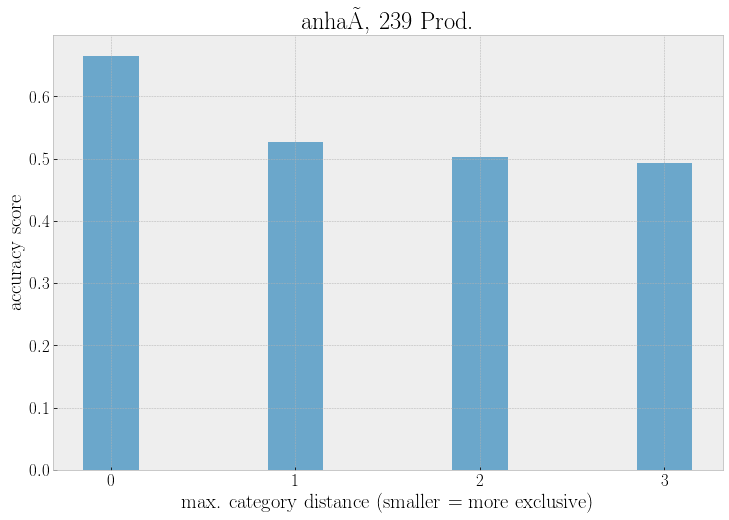

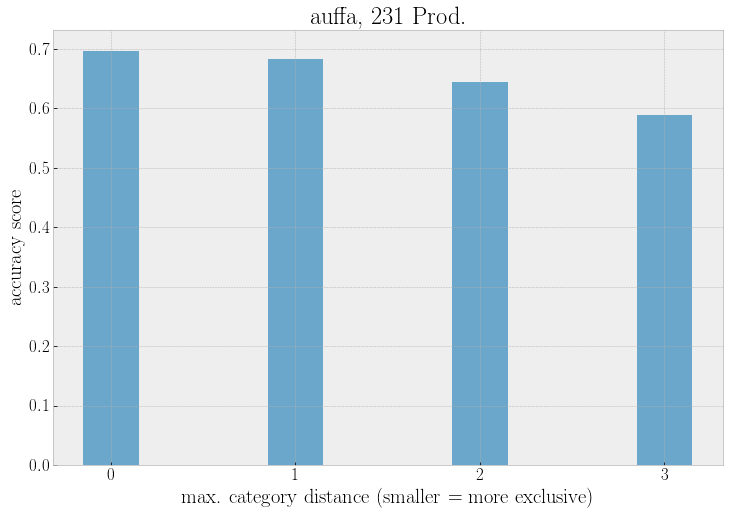

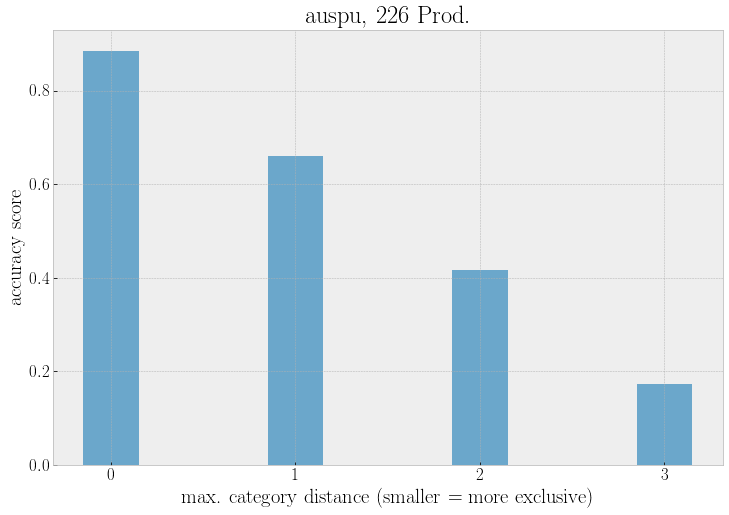

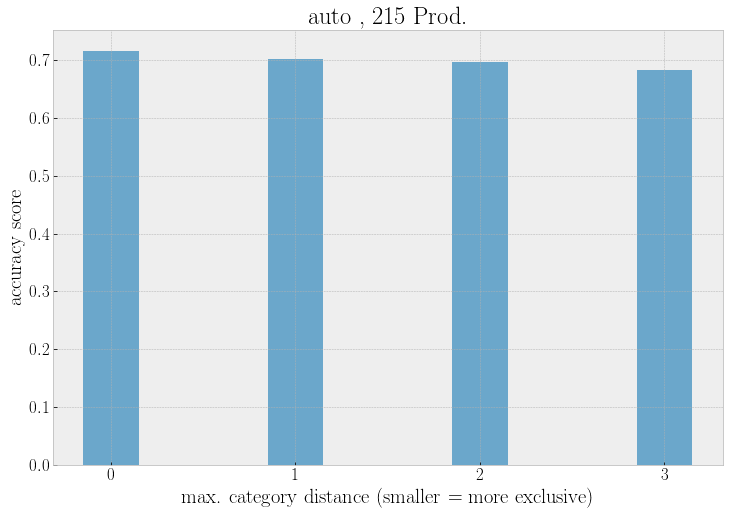

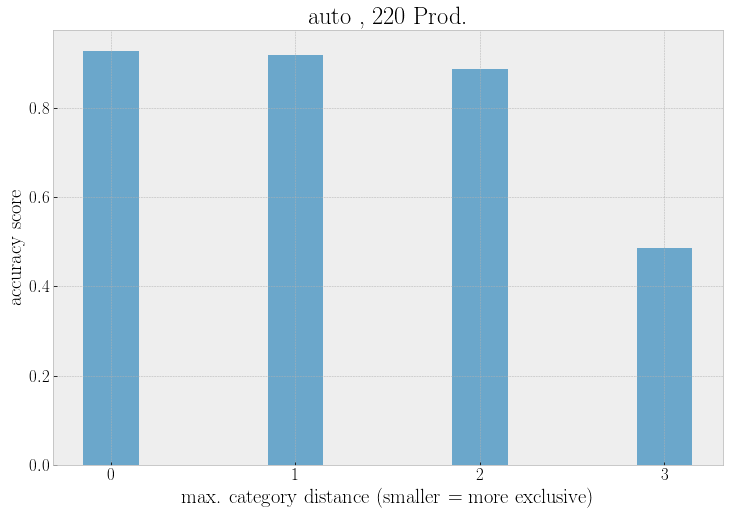

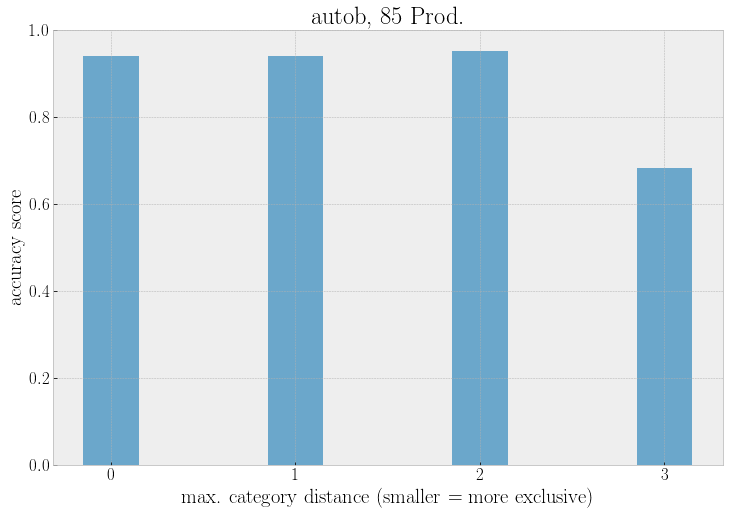

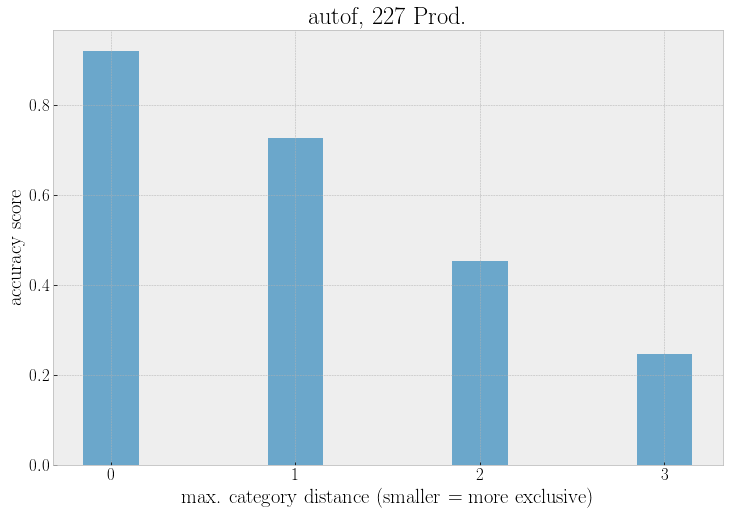

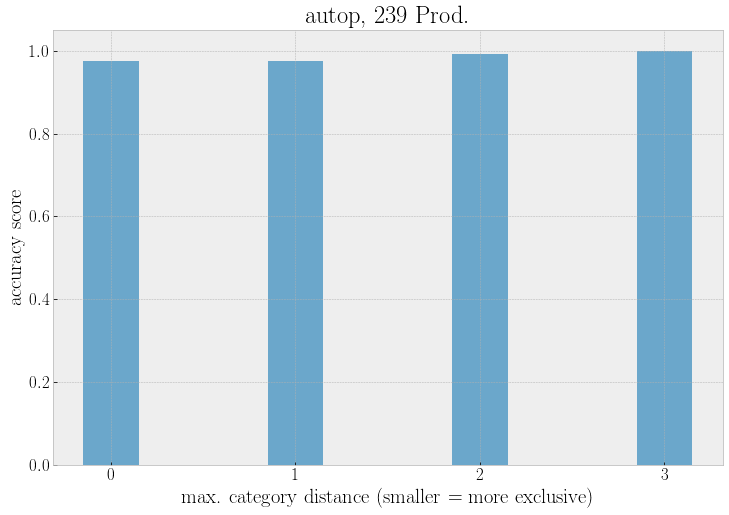

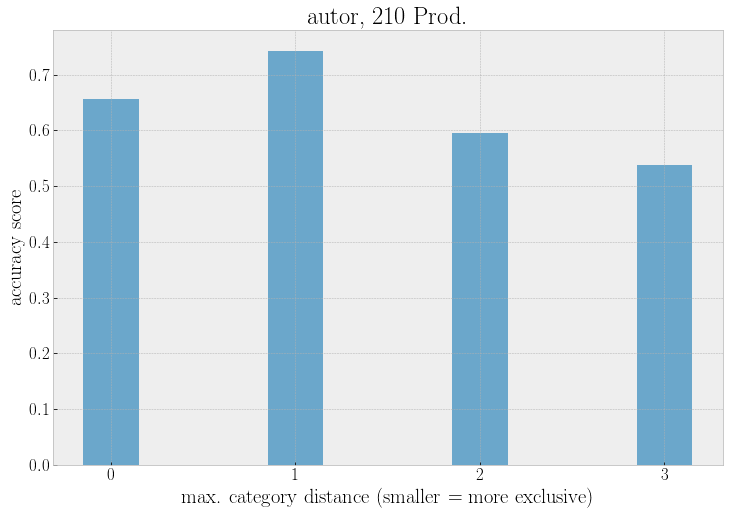

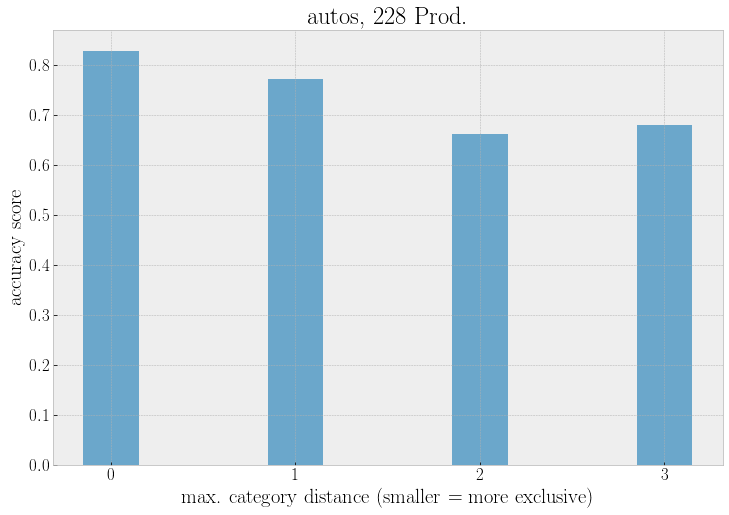

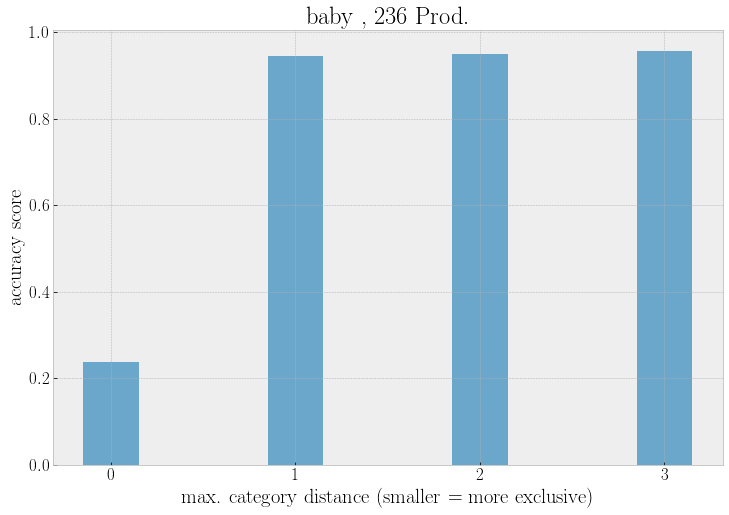

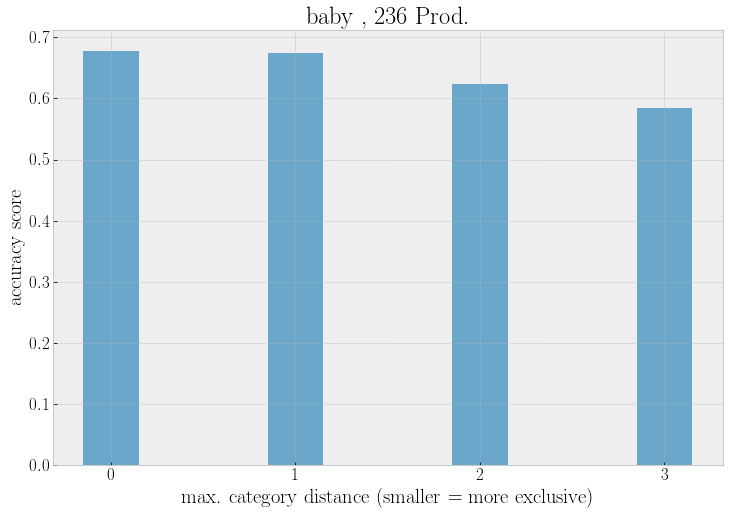

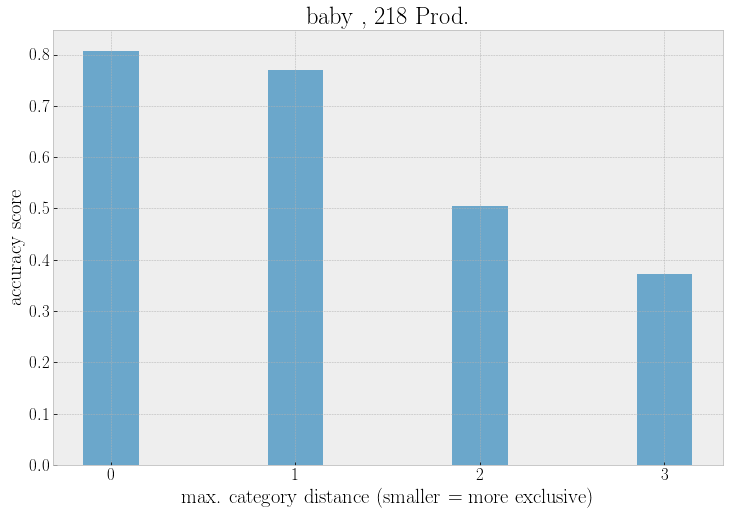

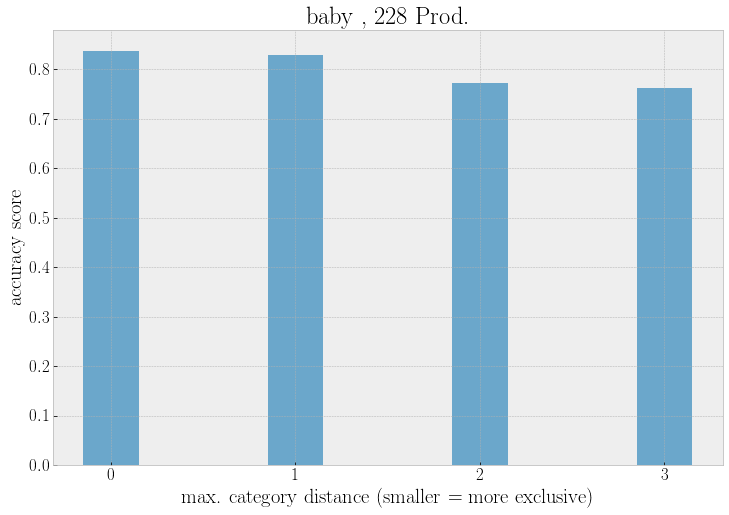

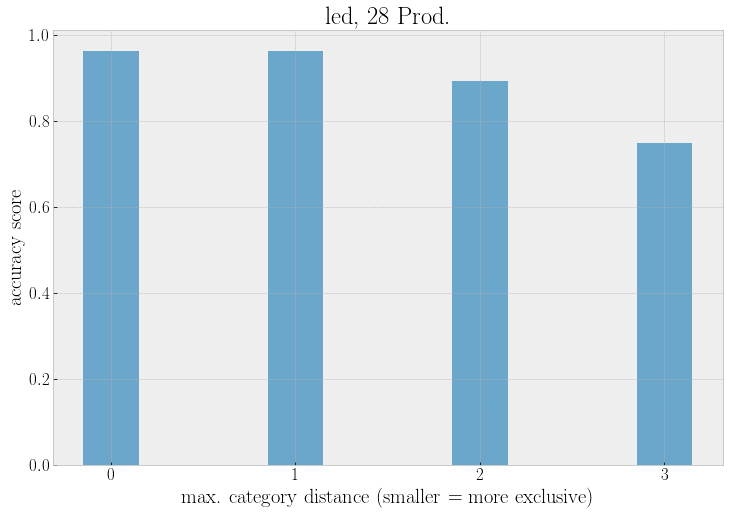

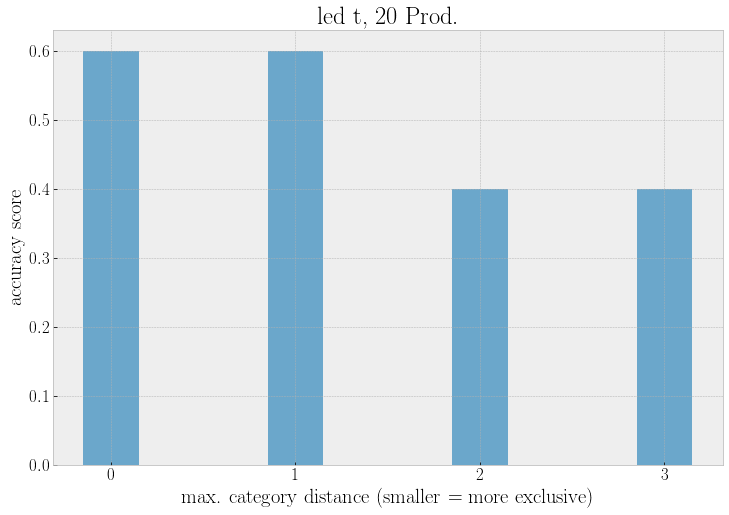

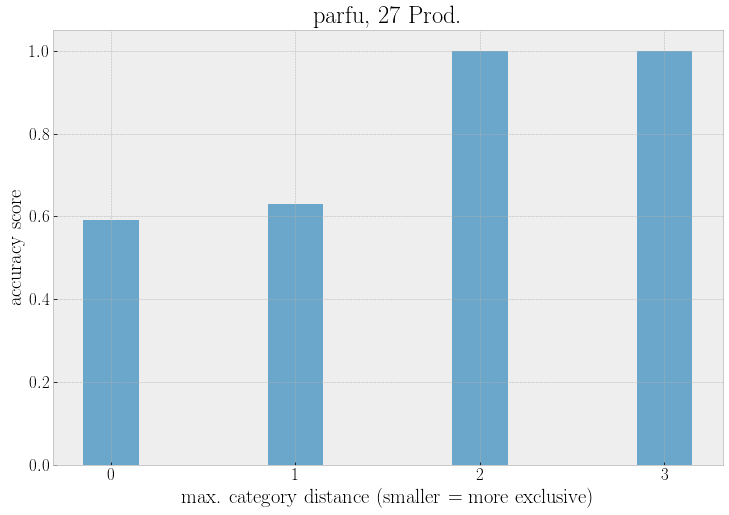

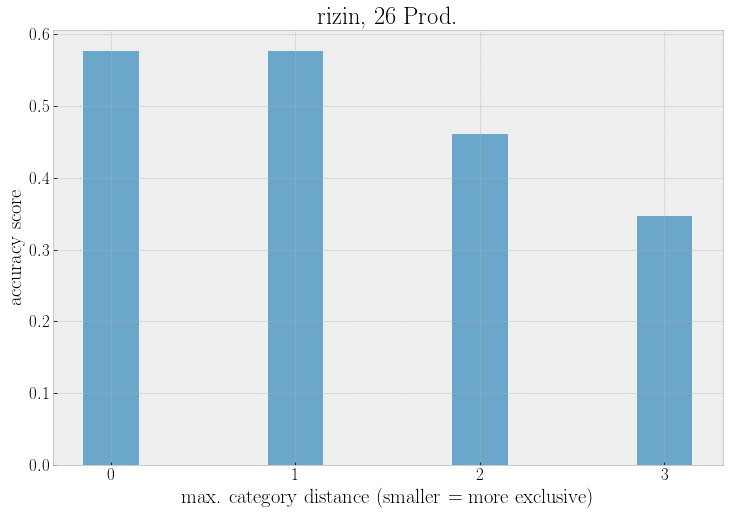

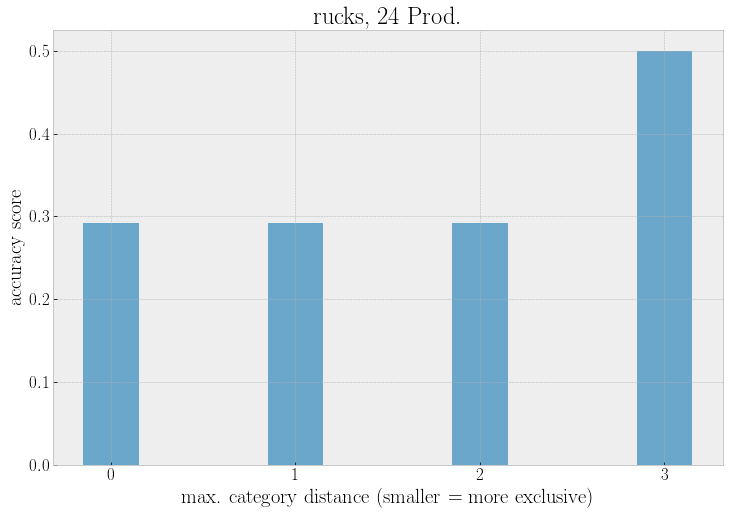

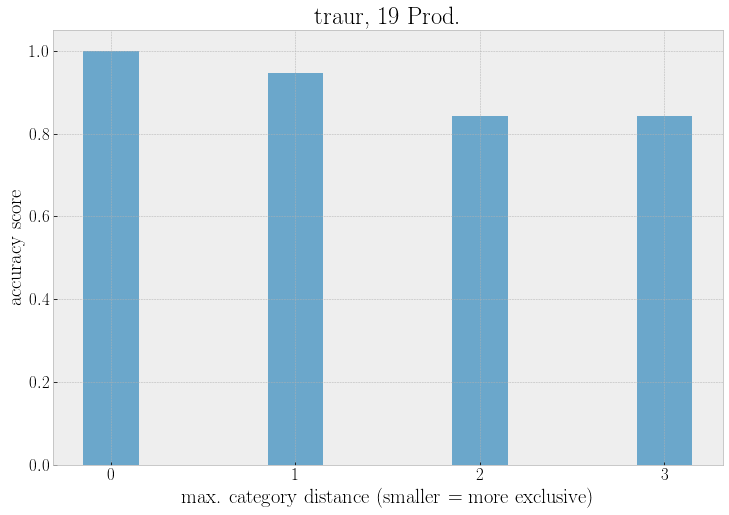

<Figure size 864x576 with 0 Axes>

In [56]:
f=[]
for i, i_df in df.groupby("keyword"):
  f.append(score(i_df)[0])
  plt.bar(f[-1].keys(), f[-1].values(), width=0.3, alpha=0.7)
  plt.xlabel("max. category distance (smaller = more exclusive)")
  plt.ylabel("accuracy score")
  plt.title(i[:5]+", "+str(len(i_df.index.values))+" Prod.")
  ax = plt.gca()
  ax.axes.xaxis.set_ticks(range(4))
  plt.figure()

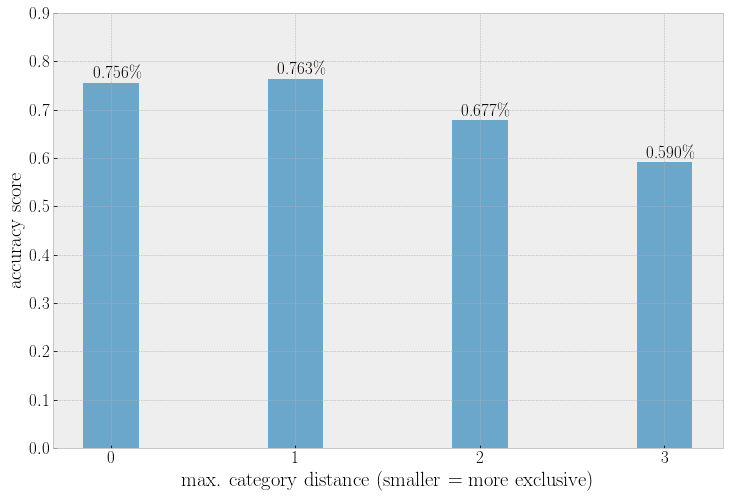

In [55]:
br=plt.bar(dd.keys(), dd.values(), width=0.3, alpha=0.7)
plt.ylim(top=0.9)
for j,b in enumerate(br):
  txt=str(list(dd.values())[j])[:5]+"\%"
  plt.text(b.xy[0]+0.05, list(dd.values())[j]+0.009, txt)
plt.xlabel("max. category distance (smaller = more exclusive)")
plt.ylabel("accuracy score")
ax = plt.gca()
ax.axes.xaxis.set_ticks(range(4));

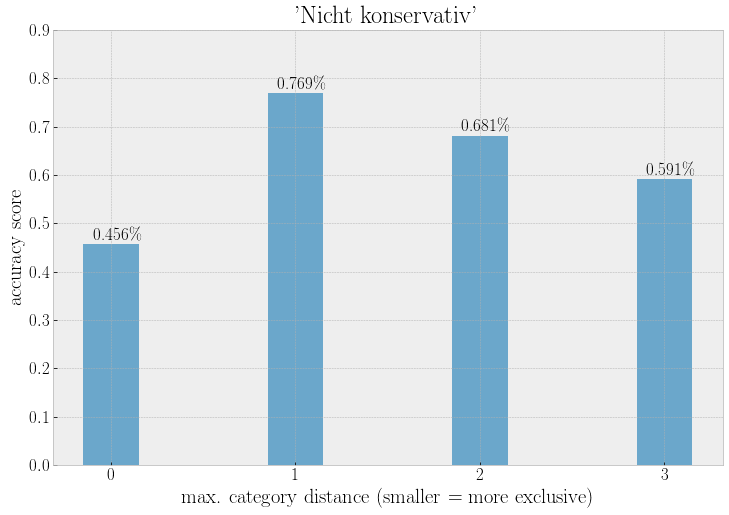

In [59]:
br=plt.bar(dd.keys(), dd.values(), width=0.3, alpha=0.7)
plt.ylim(top=0.9)
for j,b in enumerate(br):
  txt=str(list(dd.values())[j])[:5]+"\%"
  plt.text(b.xy[0]+0.05, list(dd.values())[j]+0.009, txt)
plt.xlabel("max. category distance (smaller = more exclusive)")
plt.ylabel("accuracy score")
plt.title("'Nicht konservativ'")
ax = plt.gca()
ax.axes.xaxis.set_ticks(range(4));

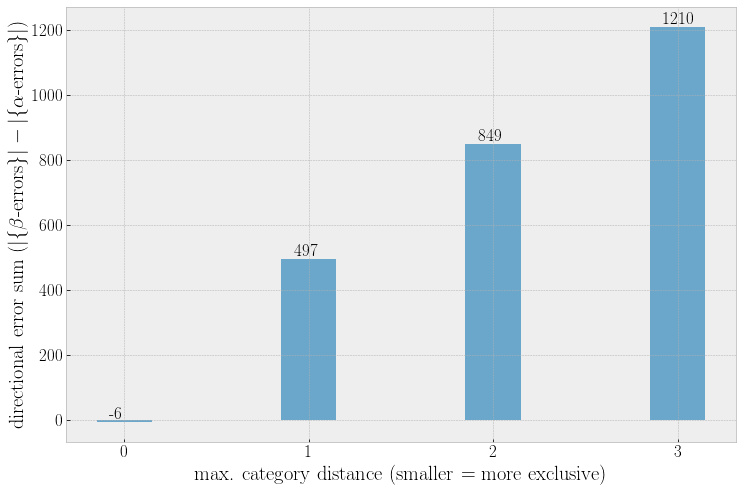

In [54]:
br=plt.bar(range(4), b_err, width=0.3, alpha=0.7)
for j,b in enumerate(br):
  txt=str(b_err[j])[:-2]
  plt.text(range(4)[j]-0.08, x[j]+10, txt)
plt.xlabel("max. category distance (smaller = more exclusive)")
plt.ylabel(r"directional error sum ($|\{\beta$-errors$\}|-|\{\alpha$-errors$\}|$)")
ax = plt.gca()
ax.axes.xaxis.set_ticks(range(4));